# Observations & Insights

* The distribution of males to female is near-enough equal with males being at a higher percentage of 50.7% and females slightly lower at 49.3% which Pie Plot demonstrates very well.

* Based on tumour volume final Box Plot Infubinol and Cefamin appears to be the most consumed drug regime, whereas Box Plot using PyPlot shows all drug regimens with Capomulin and Ramicane being the most consumed based on mice data. Therefore, these could prove useful depending on what data you are looking to analyse. 

* Scatter plot may not be the best form of data visualisation to use due to how closely the data overlaps which makes it somewhat uneasy to read. 


# Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Data Loading
- Here we load the data files to read it with pandas

In [2]:
mouse_metadata = pd.read_csv("Mouse_metadata.csv")
study_results = pd.read_csv("Study_results.csv")

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Data Exploration 

In [6]:
# Check data information, data type and structure
merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [7]:
# Check missing columns
merge_table.isnull().sum()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [8]:
# Check for any mouse ID with duplicate time points

merge_table.duplicated(["Timepoint", "Mouse ID"]).sum()

5

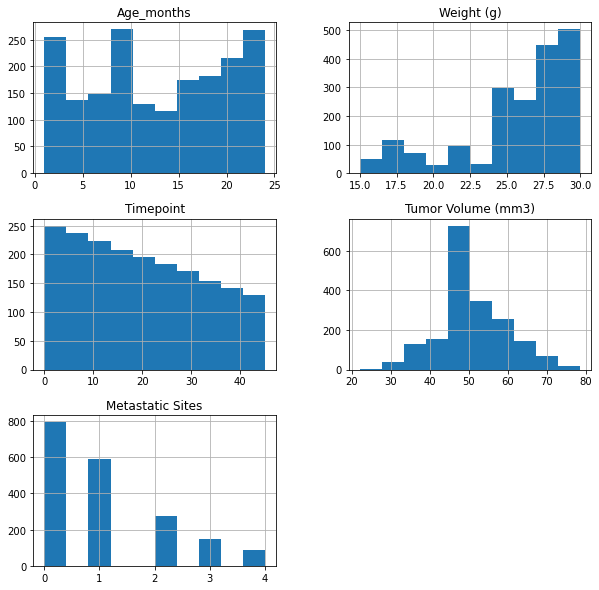

In [9]:
merge_table.hist(figsize=(10,10))
plt.show()

In [10]:
# Checking the number of mice.

merge_table["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [11]:
filter_duplicates = merge_table.duplicated(["Mouse ID", "Timepoint"])
merge_table.loc[filter_duplicates, :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
clean_df = merge_table.drop_duplicates(["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Statistical Data and Groupby

In [14]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

group_by_drug = clean_df.groupby(["Drug Regimen"])
group_by_drug.count().head(15)

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Create df with Tumor Volume statistics
drug_stats_df = group_by_drug["Tumor Volume (mm3)"].describe()

#drop unnecessary columns for new df
tumor_stats_df = drug_stats_df.drop(columns= ["count","min","25%","50%","75%","max"])

#calculate additional stats for new df
variance = group_by_drug["Tumor Volume (mm3)"].var()
median = group_by_drug["Tumor Volume (mm3)"].median()
sem = group_by_drug["Tumor Volume (mm3)"].sem()

#add additional stats columns to df
tumor_stats_df["variance"] = variance
tumor_stats_df["median"] = median
tumor_stats_df["SEM"] = sem

#reorder columns to reflect order in the instructions
tumor_stats_df = tumor_stats_df[["mean","median","variance","std","SEM"]]
tumor_stats_df

,mean,median,variance,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

group_by_drug.agg({'Tumor Volume (mm3)':["median", "mean", "var", "std", "sem"]}) 

Tumor Volume (mm3)                                          
                         median       mean        var       std       sem
Drug Regimen                                                             
Capomulin             41.557809  40.675741  24.947764  4.994774  0.329346
Ceftamin              51.776157  52.591172  39.290177  6.268188  0.469821
Infubinol             51.820584  52.884795  43.128684  6.567243  0.492236
Ketapril              53.698743  55.235638  68.553577  8.279709  0.603860
Naftisol              52.509285  54.331565  66.173479  8.134708  0.596466
Placebo               52.288934  54.033581  61.168083  7.821003  0.581331
Propriva              50.909965  52.393463  43.138803  6.568014  0.525862
Ramicane              40.673236  40.216745  23.486704  4.846308  0.320955
Stelasyn              52.431737  54.233149  59.450562  7.710419  0.573111
Zoniferol             51.818479  53.236507  48.533355  6.966589  0.516398

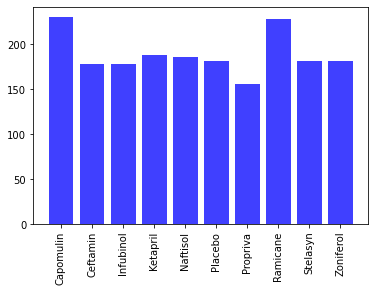

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#x axis
x_axis = np.arange(len(group_by_drug["Drug Regimen"]))

#y axis
mouse_count = group_by_drug["Mouse ID"].count()
mouse_count_df = mouse_count.to_frame()
y_axis = mouse_count_df["Mouse ID"]

#Plot bar graph
plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")

#tick mark management
tick_locations = [value for value in x_axis]
ticks = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol",
         "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.xticks(tick_locations, ticks,rotation=90)
plt.show()

# Box Plot using PyPlot

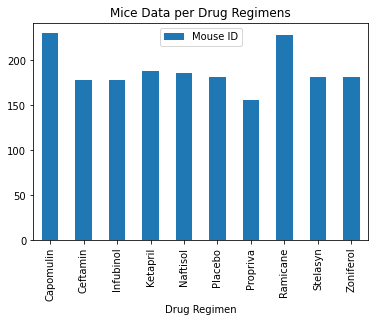

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mouse_count_df.plot(kind="bar")
plt.title("Mice Data per Drug Regimens")  
plt.show()

# Pie Plot using Pandas

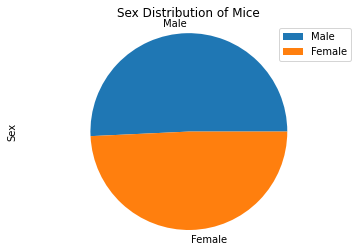

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex = clean_df["Sex"].value_counts()
sex_df = sex.to_frame()

sex_pie = sex_df.plot(kind="pie", y='Sex', title=("Sex Distribution of Mice"))

plt.axis("equal")
plt.show()

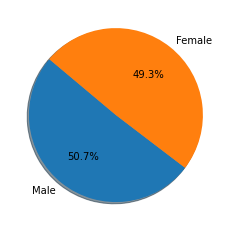

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=["Male","Female"]
plt.pie(sex, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

# Final Data Frame

In [20]:
max_tumor = clean_df.groupby("Mouse ID", as_index=False)["Timepoint"].max()
clean_df.merge(max_tumor, on= ["Mouse ID", "Timepoint"], how="left")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Put treatments into a list for for loop (and later for plot labels)

treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = merge_table.loc[merge_table["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    
# Locate the rows which contain mice on each drug and get the tumor volumes
quartile = volume.quantile([0.25,0.5,0.75])
lower = quartile[0.25]
upper = quartile[0.75]
iqr = upper - lower
    
# add subset 
    
    
# Determine outliers using upper and lower bounds
low_bound = lower - (1.5*iqr)
up_bound = upper + (1.5*iqr)
outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
if len(outliers) > 0:
    print(f"The outliers for {drug} are {outliers}.")

# Final Box Plot

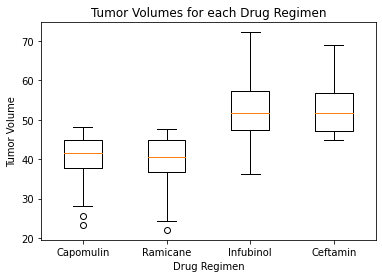

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_volume, labels = treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")

plt.show()

# Final Line Plot

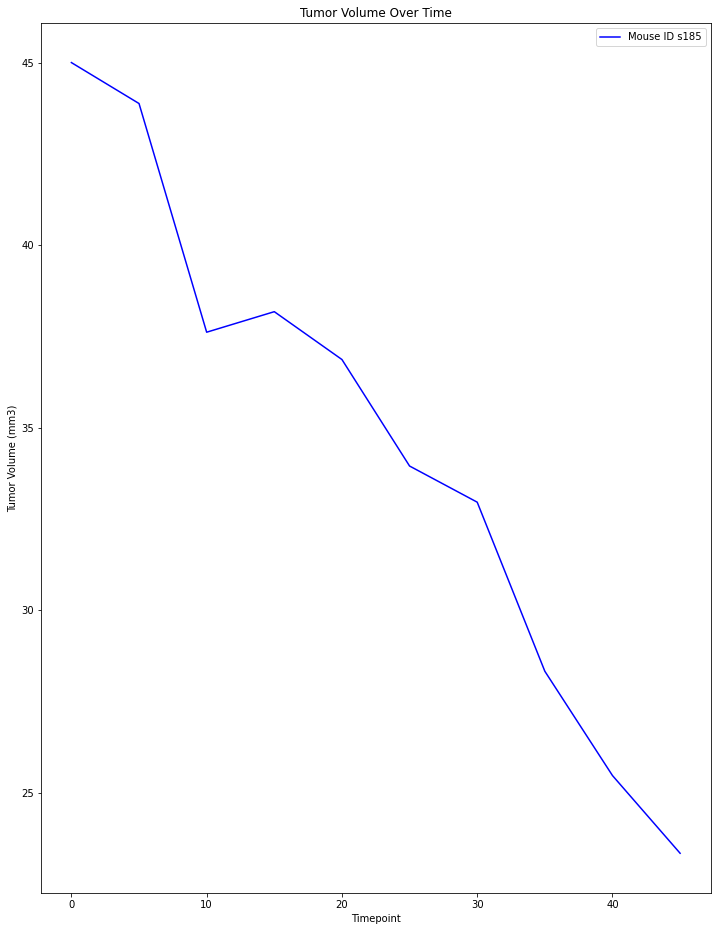

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Mouse185 = clean_df.loc[clean_df["Mouse ID"]=="s185"]

x = Mouse185["Timepoint"]
y = Mouse185["Tumor Volume (mm3)"]

plt.figure(figsize=(12, 16))

plt.plot(x, y, color="blue",label="Mouse ID s185")
plt.legend(loc="best")
plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

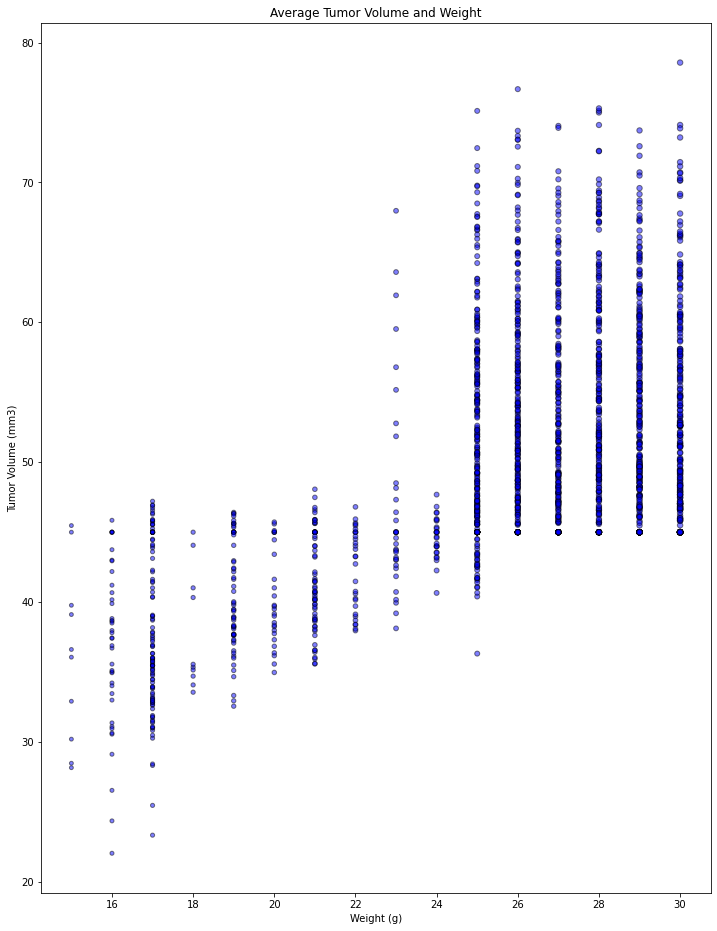

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

x_values = merge_table["Weight (g)"]
y_values = merge_table["Tumor Volume (mm3)"]

plt.figure(figsize=(12, 16))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", s=x_values, alpha=0.5)
plt.title("Average Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Scatter Plot

The correlation coefficient between mouse weight and tumor volume is 0.59


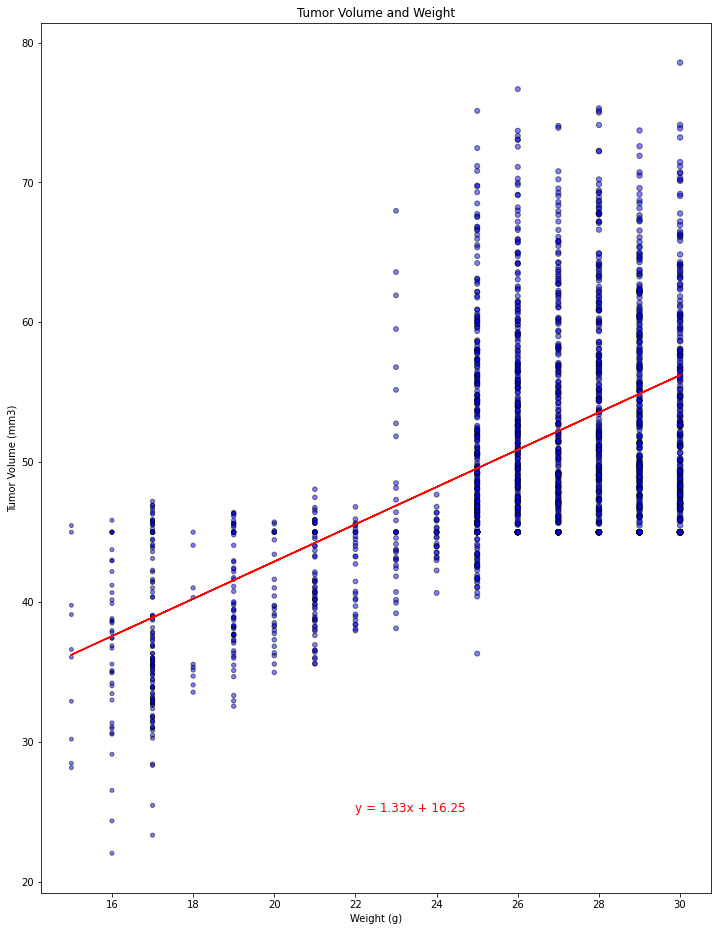

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#set x and y
x_values = merge_table["Weight (g)"]
y_values = merge_table["Tumor Volume (mm3)"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(12, 16))

#plot scatter
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.5)
plt.title("Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#plot line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,25),fontsize=12,color="red")

#print correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")